### Duplicate distribtion between fake and reliable

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as pl
import os

In [4]:
#from utils.mappings import labels
labels = {
    "fake": "fake",
    "bias": "fake",
    "junksci": "fake",
    "hate": "fake",
    "reliable": "reliable"
}

### New dataframe with id, orig_type, type, and duplicates=True

In [5]:
from_file = pl.Path(os.path.abspath('')).parent.parent.resolve() / "data_files/corpus/news_sample.csv"
dups_path = pl.Path(os.path.abspath('')).parent.parent.resolve() / "data_files/corpus/duplicates.csv"
to_path = pl.Path(os.path.abspath('')).parent.parent.resolve() / "data_files/corpus/"
file_name = "duplicate_distribution.csv"

def get_dups_distribution(from_file: pl.Path, dups_path: pl.Path, to_path: pl.Path, file_name: pl.Path) -> None:
    """Get id, type and orig_type for all duplicates in source dataset.

    Writes a file to the directory
    """
    # load id and type from source file
    df = pd.read_csv(from_file, usecols=['id','type'])
    print(f"Nulls found: \n{df.isnull().sum()}")
    df = df[df['type'].notnull()]               # filter
    df = df.rename(columns={'type':'orig_type'})
    df['type'] = df['orig_type'].map(labels)

    # load id from duplicates file
    df_dups = pd.read_csv(dups_path)
    df_dups['duplicate'] = True                 # add duplicate column
    # merge source file with duplicate check
    df = df.merge(df_dups,"left",on="id")       # match duplicate IDs in source file
    df = df[df['duplicate'].notnull()]          # filter results to show only duplicate IDs and orig_type
    df.to_csv(to_path / file_name, index=False)
    print(f"\n Distribution of duplicate IDs over type was written to {to_path}/{file_name}")

In [5]:
get_dups_distribution(from_file, dups_path, to_path, file_name)

Nulls found: 
id       0
type    13
dtype: int64

 Distribution of duplicate IDs over type was written to C:\Users\45609\OneDrive\Desktop\Filer\KU\DataScience\GruppeProjekt1\fake-news\data_files\corpus/duplicate_distribution.csv


In [6]:
df = pd.read_csv(to_path / file_name)
df

,id,orig_type,type,duplicate
0,22445,fake,fake,True
1,22583,fake,fake,True
2,26617,fake,fake,True
3,29104,fake,fake,True
4,29985,junksci,fake,True
5,37119,fake,fake,True


In [78]:
data = [['bias', 'fake', 'reliable', 'junksci', 'hate'],
 [1_138_998, 894_746, 1_913_222, 117_467, 76_496],
 [322_657, 128_710, 103_089, 31_784, 9_741]]

In [105]:
df_dups = pd.DataFrame()
df_dups['orig_type'] = data[0]
df_dups['source_articles'] = data[1]
df_dups['duplicates'] = data[2]
df_dups['included_articles'] = df_dups['source_articles']-df_dups['duplicates']
df_dups['percentage_removed'] = df_dups['duplicates']/df_dups['source_articles']
df_dups = df_dups.sort_values(by='source_articles', ascending=False)

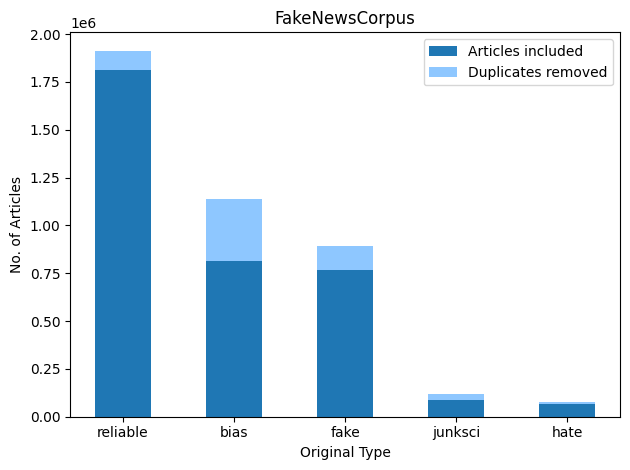

In [109]:
import numpy as np
  
X_axis = np.arange(len(df_dups['orig_type']))

plt.bar(X_axis, df_dups['included_articles'], 0.5, label = 'Articles included')
plt.bar(X_axis, df_dups['duplicates'], 0.5, bottom=df_dups['included_articles'], color="dodgerblue", label='Duplicates removed', alpha=0.5)

plt.xticks(X_axis, df_dups['orig_type'])
plt.xlabel("Original Type")
plt.ylabel("No. of Articles")
plt.title("FakeNewsCorpus")
plt.legend()
plt.show()

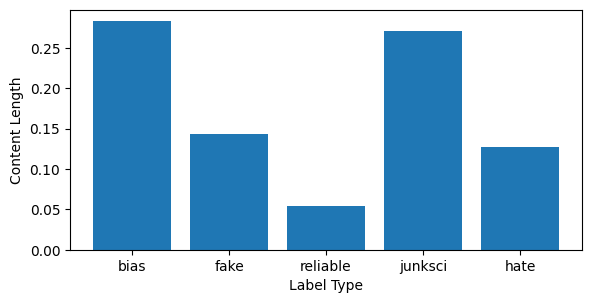

In [82]:
# Content length by Label type in Fake News Corpus
import pandas as pd


# Find the order


# create a box plot of 'content_len' by 'orig_type'
ax = plt.figure().add_axes([0,0,0.8,0.5])

ax.bar(df_dups['orig_type'], df_dups['percentage_removed'])


# add labels and title to the plot
plt.xlabel('Label Type')
plt.ylabel('Content Length')
#plt.title('Distribution of Content Length by Label Type') # titles/captions are added in 

# show the plot
plt.show()